In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier
import warnings
warnings.filterwarnings("ignore")

c:\users\khanna\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('Train_data.csv')
df.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Target
0,59.0,12.8,3.4,1.3,2.6,51.0,0.2,0.3,50.0,0.7,0.8,78.0,1.1,2.3,3.3,0.5,0.3,0.4,0.5,1
1,31.0,10.7,3.4,1.2,3.3,35.3,0.5,2.1,25.8,0.5,0.9,55.2,0.3,1.1,1.4,0.4,0.3,0.1,0.2,0
2,48.0,9.3,4.5,1.7,3.4,49.7,0.0,0.1,0.0,1.2,1.9,61.5,0.4,0.8,1.2,0.8,0.5,0.4,1.0,0
3,80.0,27.7,11.2,3.5,9.4,37.4,1.3,4.1,32.9,2.8,3.3,85.0,0.8,1.6,2.4,3.9,1.3,0.1,2.2,1
4,58.0,18.4,5.8,1.9,5.3,36.7,0.0,0.1,25.0,1.9,3.1,61.7,0.5,0.7,1.2,1.9,1.1,0.2,1.7,0


In [3]:
df.isnull().any()

GP         False
MIN        False
PTS        False
FGM        False
FGA        False
FG%        False
3P Made    False
3PA        False
3P%        False
FTM        False
FTA        False
FT%        False
OREB       False
DREB       False
REB        False
AST        False
STL        False
BLK        False
TOV        False
Target     False
dtype: bool

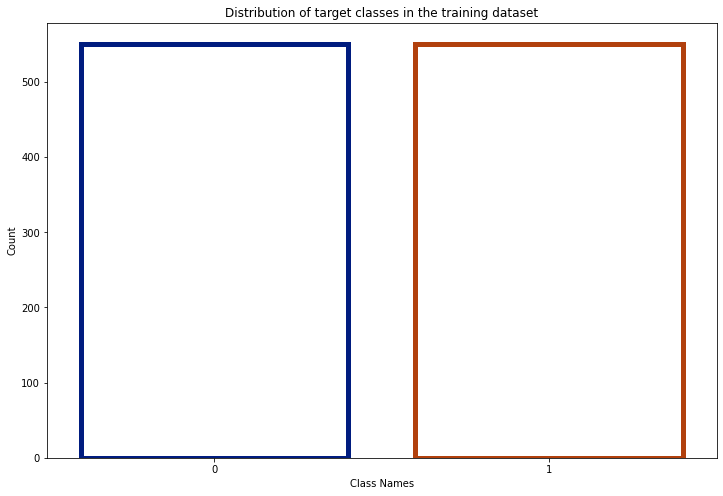

In [4]:
plt.figure(figsize=(12,8))
sns.countplot(x = 'Target', data = df, facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
plt.xlabel('Class Names')
plt.ylabel('Count')
plt.title('Distribution of target classes in the training dataset')
plt.show()

In [5]:
#both the classes are balanced.

In [6]:
len(df)

1101

In [7]:
df.drop_duplicates(inplace= True)

In [8]:
len(df)

1094

In [9]:
#It seems like we had 7 duplicates in our training set.

In [10]:
df.GP = np.floor(df.GP)

In [11]:
df.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Target
0,59.0,12.8,3.4,1.3,2.6,51.0,0.2,0.3,50.0,0.7,0.8,78.0,1.1,2.3,3.3,0.5,0.3,0.4,0.5,1
1,31.0,10.7,3.4,1.2,3.3,35.3,0.5,2.1,25.8,0.5,0.9,55.2,0.3,1.1,1.4,0.4,0.3,0.1,0.2,0
2,48.0,9.3,4.5,1.7,3.4,49.7,0.0,0.1,0.0,1.2,1.9,61.5,0.4,0.8,1.2,0.8,0.5,0.4,1.0,0
3,80.0,27.7,11.2,3.5,9.4,37.4,1.3,4.1,32.9,2.8,3.3,85.0,0.8,1.6,2.4,3.9,1.3,0.1,2.2,1
4,58.0,18.4,5.8,1.9,5.3,36.7,0.0,0.1,25.0,1.9,3.1,61.7,0.5,0.7,1.2,1.9,1.1,0.2,1.7,0


In [12]:
#Feature selection

In [13]:
features = df.iloc[:, :19]
labels = df.iloc[:, -1]

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(features,labels)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(features.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

   Specs       Score
0     GP  968.827292
1    MIN  530.113836
2    PTS  367.079567
4    FGA  245.619054
14   REB  180.250817
3    FGM  144.010868
10   FTA  113.726191
13  DREB  106.884375
9    FTM   85.792957
12  OREB   73.442175


[0.1085641  0.05899863 0.05807534 0.05980901 0.05071165 0.05289231
 0.03340919 0.04196154 0.04055392 0.05106618 0.04656102 0.04777915
 0.05782302 0.05426095 0.05206389 0.04479204 0.04473543 0.04482584
 0.05111678]


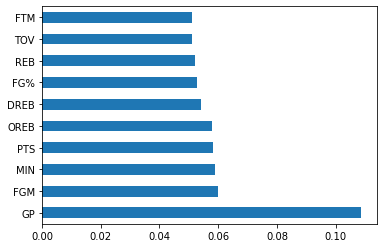

In [14]:
model = ExtraTreesClassifier()
model.fit(features,labels)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

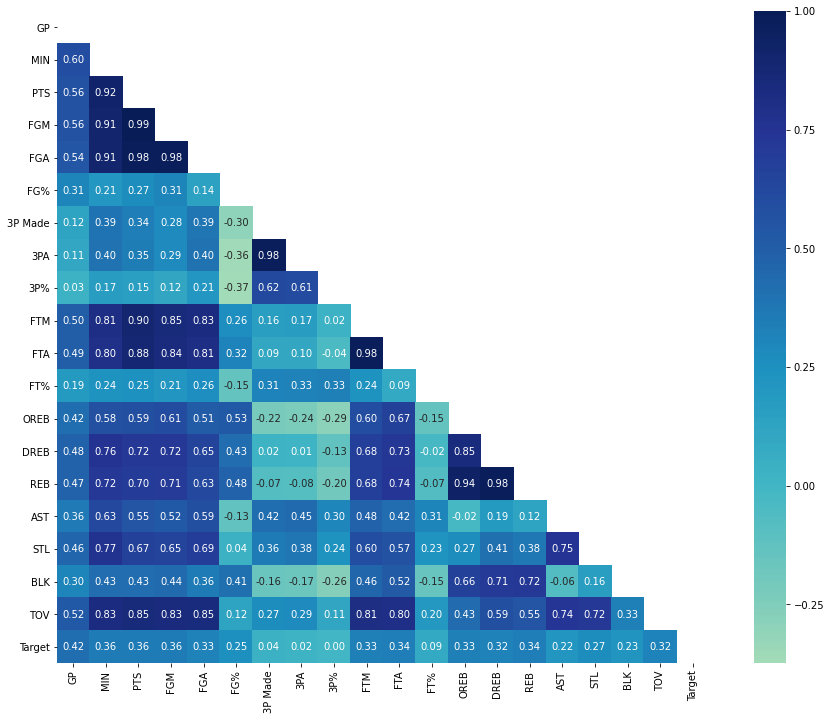

In [15]:
matrix = df.corr()
mask = np.triu(np.ones_like(matrix, dtype=bool))

plt.figure(figsize=(16, 12))

sns.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap = 'YlGnBu')

plt.show();

In [16]:
#Based on multiple feature selection techniques, I'm gonna select columns.

In [17]:
df = df[['GP', 'MIN', 'PTS', 'REB', 'FGA', 'FGM', 'Target']]

In [18]:
df.head()

,GP,MIN,PTS,REB,FGA,FGM,Target
0,59.0,12.8,3.4,3.3,2.6,1.3,1
1,31.0,10.7,3.4,1.4,3.3,1.2,0
2,48.0,9.3,4.5,1.2,3.4,1.7,0
3,80.0,27.7,11.2,2.4,9.4,3.5,1
4,58.0,18.4,5.8,1.2,5.3,1.9,0


In [19]:
scaler = StandardScaler()
X = scaler.fit_transform(df.drop('Target', axis = 1))

In [20]:
#Splitting the features and labels

In [21]:
y = df['Target']

In [22]:
#We're gonna use multiple models to see which one has the best accuracy. So for that, we'll make a dictionary with all the models and their hyperparameters

In [24]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [10,12,20],
            'kernel': ['rbf','linear', 'poly']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [20, 30, 50, 100, 150, 200]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'decision_tree' : {
        'model': DecisionTreeClassifier(),
        'params': {
            
        }
    },
    'gaussian_nb' : {
        'model': GaussianNB(),
        'params': {
            
        }
    }
}

In [25]:
#Then we use GridSearchCV to train the model using corresponding hyperparameters and store the model name, best score and
#best hyperparameters in a dataframe

In [26]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df1 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df1

,model,best_score,best_params
0,svm,0.698354,"{'C': 12, 'kernel': 'rbf'}"
1,random_forest,0.714809,{'n_estimators': 100}
2,logistic_regression,0.696531,{'C': 1}
3,decision_tree,0.633497,{}
4,gaussian_nb,0.669084,{}


In [27]:
#Out of all the models, Random Forest seems to give the best result

In [28]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

In [30]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
pred = rf.predict(X_val)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
print('Accuracy Score is: ', accuracy_score(y_val, pred))

Accuracy Score is:  0.7031963470319634


In [34]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.74      0.67      0.70       115
           1       0.67      0.74      0.70       104

    accuracy                           0.70       219
   macro avg       0.70      0.70      0.70       219
weighted avg       0.71      0.70      0.70       219



In [37]:
print(confusion_matrix(y_val, pred))

[[77 38]
 [27 77]]


Text(69.0, 0.5, 'Actuals')

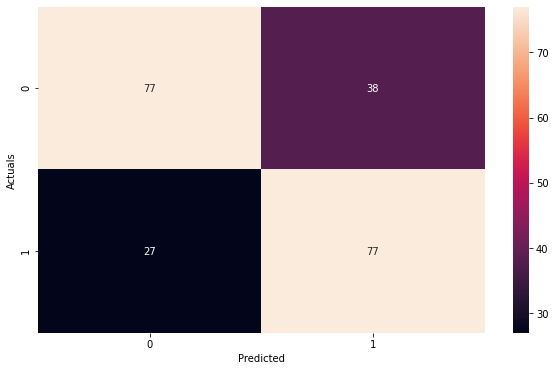

In [49]:
plt.figure(figsize = (10, 6))
sns.heatmap(confusion_matrix(y_val, pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actuals')

In [40]:
test_data = pd.read_csv('Test_data.csv')

In [41]:
test_data.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,44.0,13.0,6.6,2.5,5.6,45.3,0.4,1.3,32.7,1.1,1.7,65.3,0.8,0.6,1.4,1.1,0.7,0.2,1.0
1,51.0,9.1,2.7,1.0,2.7,39.0,0.1,0.3,23.5,0.6,0.8,69.8,0.3,0.7,1.0,0.9,0.6,0.1,0.7
2,51.0,15.1,5.7,2.2,5.2,41.2,0.3,0.8,32.5,1.1,1.6,69.1,0.4,1.3,1.7,2.1,0.7,0.0,1.4
3,15.0,7.9,1.9,0.7,2.5,27.0,0.0,0.0,0.0,0.5,0.8,66.7,0.5,1.1,1.5,0.5,0.1,0.1,1.0
4,36.0,14.4,5.8,2.3,5.4,43.1,0.0,0.1,50.0,1.1,1.4,82.0,1.1,1.4,2.4,0.9,0.3,0.2,0.9


In [42]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GP       555 non-null    float64
 1   MIN      555 non-null    float64
 2   PTS      555 non-null    float64
 3   FGM      555 non-null    float64
 4   FGA      555 non-null    float64
 5   FG%      555 non-null    float64
 6   3P Made  555 non-null    float64
 7   3PA      555 non-null    float64
 8   3P%      555 non-null    float64
 9   FTM      555 non-null    float64
 10  FTA      555 non-null    float64
 11  FT%      555 non-null    float64
 12  OREB     555 non-null    float64
 13  DREB     555 non-null    float64
 14  REB      555 non-null    float64
 15  AST      555 non-null    float64
 16  STL      555 non-null    float64
 17  BLK      555 non-null    float64
 18  TOV      555 non-null    float64
dtypes: float64(19)
memory usage: 82.5 KB


In [45]:
test_data = test_data[['GP', 'MIN', 'PTS', 'REB', 'FGA', 'FGM']]

In [46]:
scaler = StandardScaler()
test_data = scaler.fit_transform(test_data)

In [47]:
target = rf.predict(test_data)

In [48]:
res = pd.DataFrame(target) 
res.columns = ["prediction"]
res.to_csv("submission.csv", index = False)